In [41]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load SOFI stock data
sofi_data = yf.download('SOFI', start='2020-01-01', end='2023-12-31')
sofi_data['Target'] = sofi_data['Adj Close'].shift(-1)  # Predicting the next day's price

# Feature selection
X = sofi_data.drop(columns=['Target', 'Adj Close'])
y = sofi_data['Target'].dropna()

# Drop NaNs from features
X = X[:-1]  # Ensure the lengths match
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for SOFI stock price prediction: {mse}')
print(y_pred)


[*********************100%***********************]  1 of 1 completed


Mean Squared Error for SOFI stock price prediction: 0.554854524066059
[ 5.45449991  5.42059989  4.38110003 16.94129997 22.79719986  5.31119996
  8.17820001 16.0288003  10.21499994  7.51920004  5.78090004  8.05989993
  6.84689996  6.78920007  4.46860002 21.57789993  6.83624999  9.37280005
 19.9904002  19.05820013  5.12029994  6.29669996  8.18699989  5.01539993
  6.0577     18.83780033  9.71350002 22.50379986  5.96890001 14.88229987
 21.86079971  7.55920005  8.16469999 21.68229971  9.5102001   6.03589997
 22.68400007  5.70809993  5.88509997 15.69170009 12.28049999  6.78839989
  8.13570006  7.67669994  6.87669996 21.28319963 21.68919977  4.52259999
 17.43209978  7.09869982  5.38079996  5.23789995  6.73779991  9.40800012
 22.37189987 15.93410006  7.6211     22.53769995  6.04579998 13.7769999
 16.52599995 17.32819988 17.86680002 17.8227001  15.21059996  6.35949998
  4.94270001 11.09030011 18.3952      7.87539994  8.32839998  5.26239995
  5.95909997  7.16470008  5.34479996 10.25999994  9.023

In [82]:
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor

# Load SOFI stock data
sofi_data = yf.download('SOFI', start='2020-01-01', end='2023-12-31')
sofi_data['Target'] = sofi_data['Adj Close'].shift(-1)  # Predicting the next day's price

# Feature selection
X = sofi_data.drop(columns=['Target', 'Adj Close']).dropna()  # Drop rows with NaN values
y = sofi_data['Target'].dropna()

# Ensure X and y are perfectly aligned by dropping the last row from both if necessary
X = X.iloc[:-2]  # Drop the last row of X to match the length of y
y = y.iloc[:-1]  # Drop the last element of y to align with X

# Get the most recent day's features for prediction
most_recent_day = X.iloc[-1:]  # Selecting the last day in the dataset

# Train on all previous data
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X, y)  # Train on aligned data

# Predict the next day's price based on the most recent data
next_day_prediction = rf_regressor.predict(most_recent_day)
print(f'Predicted SOFI stock price for the next day: {next_day_prediction[0]}')


[*********************100%***********************]  1 of 1 completed


Predicted SOFI stock price for the next day: 10.339099817276


[*********************100%***********************]  1 of 1 completed
/var/folders/5j/08vl_fjx6cj5ylf8zh9tkxyr0000gn/T/ipykernel_68101/2232806935.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  simulations[0, i] = nvidia_data[-1]  # start from the last known price


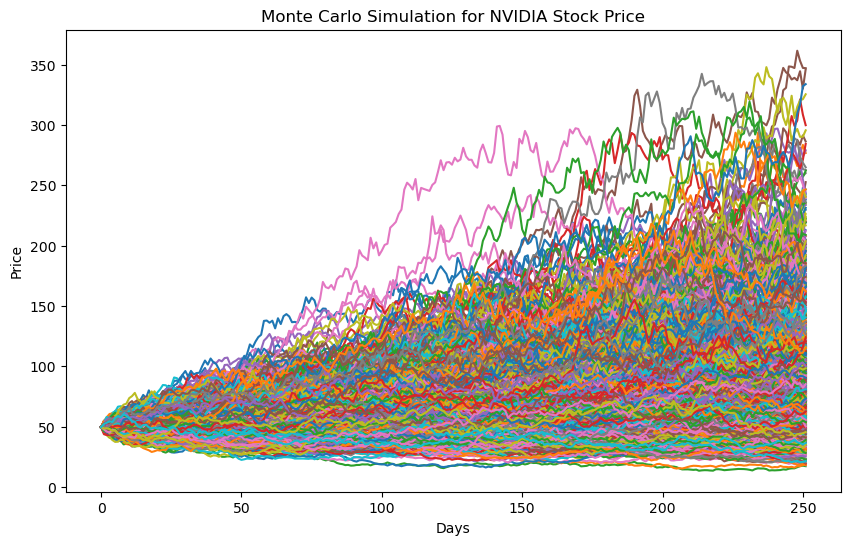

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Load NVIDIA stock data
nvidia_data = yf.download('NVDA', start='2020-01-01', end='2023-12-31')['Adj Close']

# Monte Carlo Simulation Parameters
num_simulations = 1000
num_days = 252  # 1 year trading days
returns = nvidia_data.pct_change().dropna()

# Calculate mean and standard deviation of returns
mean_return = returns.mean()
std_dev = returns.std()

# Monte Carlo simulation
simulations = np.zeros((num_days, num_simulations))
for i in range(num_simulations):
    simulations[0, i] = nvidia_data[-1]  # start from the last known price
    for t in range(1, num_days):
        shock = np.random.normal(mean_return, std_dev)
        simulations[t, i] = simulations[t-1, i] * (1 + shock)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(simulations)
plt.title('Monte Carlo Simulation for NVIDIA Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()


In [31]:
def generate_trading_signals(stock_data, short_window, long_window):
    # Calculate Moving Averages
    stock_data['SMA_Short'] = stock_data['Adj Close'].rolling(window=short_window).mean()
    stock_data['SMA_Long'] = stock_data['Adj Close'].rolling(window=long_window).mean()

    # Generate signals
    stock_data['Signal'] = 0.0
    stock_data['Signal'] = np.where(stock_data['SMA_Short'] > stock_data['SMA_Long'], 1.0, 0.0)
    stock_data['Position'] = stock_data['Signal'].diff()
    return stock_data

# SOFI Moving Average Crossover Strategy
sofi_data = yf.download('SOFI', start='2020-01-01', end='2023-12-31')
sofi_strategy = generate_trading_signals(sofi_data, short_window=50, long_window=200)

# NVIDIA Moving Average Crossover Strategy
nvidia_data = yf.download('NVDA', start='2020-01-01', end='2023-12-31')
nvidia_strategy = generate_trading_signals(nvidia_data, short_window=50, long_window=200)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [32]:
sofi_strategy

,Open,High,Low,Close,Adj Close,Volume,SMA_Short,SMA_Long,Signal,Position
Date,,,,,,,,,,
2021-01-04,12.590000,12.590,11.800000,12.200000,12.200000,1371400,NaN,NaN,0.0,NaN
2021-01-05,12.150000,12.280,12.090000,12.150000,12.150000,1304000,NaN,NaN,0.0,0.0
2021-01-06,12.150000,12.200,11.890000,12.120000,12.120000,1105700,NaN,NaN,0.0,0.0
2021-01-07,12.200000,22.000,12.050000,19.139999,19.139999,64877000,NaN,NaN,0.0,0.0
2021-01-08,21.459999,22.000,17.889999,18.740000,18.740000,35657000,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,9.770000,9.880,9.585000,9.710000,9.710000,29080400,7.7695,7.540525,1.0,0.0
2023-12-26,9.830000,9.990,9.745000,9.960000,9.960000,26013700,7.8063,7.562425,1.0,0.0
2023-12-27,10.010000,10.490,10.000000,10.320000,10.320000,44253700,7.8477,7.586575,1.0,0.0


In [33]:
nvidia_strategy

,Open,High,Low,Close,Adj Close,Volume,SMA_Short,SMA_Long,Signal,Position
Date,,,,,,,,,,
2020-01-02,5.968750,5.997750,5.918000,5.997750,5.973122,237536000,NaN,NaN,0.0,NaN
2020-01-03,5.877500,5.945750,5.852500,5.901750,5.877517,205384000,NaN,NaN,0.0,0.0
2020-01-06,5.808000,5.931750,5.781750,5.926500,5.902165,262636000,NaN,NaN,0.0,0.0
2020-01-07,5.955000,6.044250,5.909750,5.998250,5.973621,314856000,NaN,NaN,0.0,0.0
2020-01-08,5.994000,6.051000,5.953750,6.009500,5.984824,277108000,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,49.195000,49.382999,48.466999,48.830002,48.819527,252507000,46.271042,40.065093,1.0,0.0
2023-12-26,48.967999,49.599998,48.959999,49.278999,49.268425,244200000,46.347465,40.196666,1.0,0.0
2023-12-27,49.511002,49.680000,49.084999,49.417000,49.406395,233648000,46.413972,40.328924,1.0,0.0


In [83]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.covariance import LedoitWolf
import statsmodels.api as sm

# Download stock data
portfolio_tickers = ['NVDA', 'AAPL', 'QQQ', 'MSFT', 'GOOGL', 'AMZN', 'SMH', 'JNJ', 'PG', 'VNQ']
portfolio_data = yf.download(portfolio_tickers, start='2020-01-01', end='2024-08-31')['Adj Close']

# Calculate daily returns
portfolio_returns = portfolio_data.pct_change().dropna()

# Compute mean returns and covariance matrix (with Ledoit-Wolf shrinkage)
mean_returns = portfolio_returns.mean().values
cov_matrix = LedoitWolf().fit(portfolio_returns).covariance_

# Monte Carlo Simulation parameters
n_simulations = 1000
n_days = 251  # Match this to the length of the simulation

start_prices = portfolio_data.iloc[-1].values
simulated_prices = np.zeros((n_simulations, n_days, len(portfolio_tickers)))

# Monte Carlo simulations
for i in range(n_simulations):
    daily_returns = np.random.multivariate_normal(mean_returns, cov_matrix, n_days)
    simulated_prices[i] = start_prices * np.exp(np.cumsum(daily_returns, axis=0))

# Calculate the simulated portfolio returns (using equal weighting as an example)
simulated_portfolio_returns = np.mean(simulated_prices, axis=2)

# Percentage change manually calculated
simulated_portfolio_returns_pct_change = np.diff(simulated_portfolio_returns, axis=1) / simulated_portfolio_returns[:, :-1]
simulated_portfolio_returns_mean = np.mean(simulated_portfolio_returns_pct_change, axis=0)

# Download benchmark data (NASDAQ in this case)
benchmark_data = yf.download('^GSPC', start='2020-01-01', end='2024-08-31')['Adj Close'].pct_change().dropna()

# **Truncate the benchmark data** to match the number of simulated returns (251 days)
benchmark_data_truncated = benchmark_data[-n_days:]

# Remove the first day of benchmark data to match the length of simulated portfolio returns (250 days)
benchmark_data_truncated = benchmark_data_truncated[1:]

# Ensure the length of simulated returns matches the truncated benchmark data
simulated_portfolio_returns_mean = pd.Series(simulated_portfolio_returns_mean[:len(benchmark_data_truncated)], index=benchmark_data_truncated.index)

# CAPM - Linear regression to calculate alpha and beta
X = sm.add_constant(benchmark_data_truncated)  # Add constant for the intercept
Y = simulated_portfolio_returns_mean
model = sm.OLS(Y, X).fit()

# Output Alpha and Beta
alpha = model.params['const']
beta = model.params['Adj Close']
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")

# Print regression summary
print(model.summary())


[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed

Alpha: 0.0012776635407377318
Beta: -0.0049817765560425525
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.439
Date:                Mon, 23 Sep 2024   Prob (F-statistic):              0.232
Time:                        00:00:40   Log-Likelihood:                 1539.6
No. Observations:                 250   AIC:                            -3075.
Df Residuals:                     248   BIC:                            -3068.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------